In [1]:
#https://stackoverflow.com/questions/47330244/generating-random-transition-probability-matrix-python
#https://docs.python.org/3/library/random.html
#ref: https://www.datacamp.com/tutorial/markov-chains-python-tutorial

In [1]:
#Generate Transition Matrix
import numpy as np
import random

class Transition:
    def __init__(self, K, n):
        self.transition_matrix = []
        self.k=K
        self.nodes=n
        self.dist = ["uniform","pareto","expovariate"]

        for i in range(self.nodes):
            self.transition_matrix.append(self.gen_state_prob(self.k,self.dist[0])) #SELECT DIST
            
            if sum(self.transition_matrix[i]) != 1:
                add = 1- sum(self.transition_matrix[i])
                self.transition_matrix[i][0] += add
                self.transition_matrix[i][0] = round(self.transition_matrix[i][0],2)
            
            
        for i in range(self.k):
            for j in range(self.k):
                self.transition_matrix[i][j] = round(self.transition_matrix[i][j], 2)
        
        if len(self.transition_matrix) != n: print("Error generating transition matrix")

    def gen_state_prob(self,K=3, distribution="uniform"):
        k=K
        a, m = 3., 2.  #Pareto
        result = []
        r=0

        if distribution == "uniform":
            #result = [[np.random.default_rng().uniform(0, 0.1 / k) for i in range(k)] for j in range(k)]
            result = np.identity(k) + np.random.uniform(low=0., high=1., size=(k, k))
            result /= result.sum(axis=1, keepdims=1)
        elif distribution == "pareto":
            result = [[(np.random.default_rng().pareto(a, 3) + 1) * m for i in range(k)] for j in range(k)]
            #print("\n\n", distribution, "-before->", type(result), result)
            temp= [result[0][i] for i in range(k)]
            result=temp
            #print("\n\n", distribution, "-after->", type(result), result)
            #return
        elif distribution == "expovariate":
            result = [[random.expovariate(alpha/k) for i in range(k)] for j in range(k)]

        #print("\n\n", distribution, "-->", result)
        #return

        for j, r in enumerate(result):
            r[j] += 1 - sum(r)
            
        
        #for x in transition_matrix:
        #    print(x, sum(x))
        self.transition_matrix = result
        self.transition_matrix = [list(x) for x in self.transition_matrix]


    def get_transition_matrix(self):
        return self.transition_matrix

## Plot State Transition Diagram

In [3]:
'''
import numpy as np
from matplotlib import pyplot as plt

# Import the MarkovChain class from markovchain.py
from markovchain import MarkovChain
P = np.array(transition_matrix)
mc = MarkovChain(P, ['left', 'straight', 'right'])
mc.draw()
'''

"\nimport numpy as np\nfrom matplotlib import pyplot as plt\n\n# Import the MarkovChain class from markovchain.py\nfrom markovchain import MarkovChain\nP = np.array(transition_matrix)\nmc = MarkovChain(P, ['left', 'straight', 'right'])\nmc.draw()\n"

In [4]:
#https://medium.com/@__amol__/markov-chains-with-python-1109663f3678

In [2]:
import numpy as np
 
class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_matrix: 2-D array
            A 2-D array representing the probabilities of change of 
            state in the Markov Chain.
 
        states: 1-D array 
            An array representing the states of the Markov Chain. It
            needs to be in the same order as transition_matrix.
        """
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in 
                           range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in
                           range(len(self.states))}
 
    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
         self.states, 
         p=self.transition_matrix[self.index_dict[current_state], :]
        )
 
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

In [3]:
import numpy as np

class Population:
    N = 0
    a = 0
    b = 0
    ntrials = 0
    x = []
    
    def __init__(self, n, A, B, trials):
        self.N = n  # maximum number of cars at an intersection
        self.a = A / self.N  # car arrival rate
        self.b = B / self.N  # car departure rate
        self.ntrials = trials
        self.x = np.random.randint(size=self.ntrials, low=0, high=self.N)
        #print("x: ", self.x)
        self.simulate(10)

    def simulate(self, nsteps):
        """Run the simulation."""
        #self.x = 
        for _ in range(nsteps - 1):
            # Which trials to update?
            upd = (0 < self.x) & (self.x < self.N - 1)
            # In which trials do births occur?
            ####birth = 1 * (np.random.rand(ntrials) <= a * x)
            birth = 1 * (np.random.pareto(self.ntrials) <= self.a * self.x)
            # In which trials do deaths occur?
            ####death = 1 * (np.random.rand(ntrials) <= b * x)
            death = 1 * (np.random.pareto(self.ntrials) <= self.b * self.x)
            # We update the population size for all trials
            self.x[upd] += birth[upd] - death[upd]

    def get_sim_data(self):
        return self.x

## Simulate Map

In [12]:
class Simulate:
    
    def __init__(self,steps):
        self.lMap = []                     #holds all timeSteps/snapshots from the map
        self.lCars = []
        self.addCars = False
        self.LearningFeatures = []
        self.LearningLabels = []
        self.TestingFeatures = []
        self.TestingLabels = []
        self.tSteps = steps
    
    def updateTransitionMatrix(self,tm_0, tm_1, cars_0, cars_1):
        #how to change transition matrix when new cars are added
        return tm_1

    #if true, adds new cars to intersection
    #if false, carries over only the cars coming in from previous intersections
    def addNewCars(self,cars):
        if self.addCars: return cars
        else: return 0
        
    #updates lMap with newly added cars after every time period
    def updateMap(self,lMap, cars, step):
        
        flatFeatures = []
        #dVertices[i] = {0, [step,[[transition_matrix]], state, 0]}
        T = Transition(3,3)

        if len(self.lMap) > 0:
            mostRecentTimeStep = self.lMap[(len(self.lMap)-1)]
            #print("mostRecentTimeStep",mostRecentTimeStep)
            nextTimeStep = {}
            prevState = mostRecentTimeStep[0][2]  #copy previous state from last time step
            #print(prevState)
            #print("mostRecentTimeStep[0][2]",mostRecentTimeStep[0][2])
            #print("mostRecentTimeStep[0][1][1][1]",mostRecentTimeStep[0][1][1][1])

            for i in range(len(self.tSteps)):
                # Generate Transition Matrix for intersection i and assign to intersection
                T.gen_state_prob(3,"uniform")
                transition_matrix = T.get_transition_matrix()
                # predict next turn for intersection i 
                traffic_chain = MarkovChain(transition_matrix=transition_matrix,
                                    states=['left', 'straight', 'right'])
                state = traffic_chain.next_state(current_state=prevState)
                
                #----------------------------------------------------
                # Add Learning data to separate arrays along the way
                #----------------------------------------------------
                
                for row in transition_matrix:
                    for prob in row:
                        flatFeatures.append(prob)
                
                if prevState == "left": flatFeatures.append(0)
                elif prevState == "straight": flatFeatures.append(1)
                elif prevState == "right": flatFeatures.append(2)
                
                self.LearningFeatures.append(flatFeatures)
                self.LearningLabels.append(state)
                flatFeatures = []
                #----------------------------------------------------
                
                if prevState == "left":
                    if state == "left":
                        nextTimeStep[i] = [step,
                               #mostRecentTimeStep[i][1], #transition_matrix for vertex
                               transition_matrix,
                               state, 
                               int(self.addNewCars(cars[i]) + (mostRecentTimeStep[i][3] * mostRecentTimeStep[i][1][0][0]))] #updated number of cars for this step
                    elif state == "straight":
                        nextTimeStep[i] = [step,
                               #mostRecentTimeStep[i][1], #transition_matrix for vertex
                               transition_matrix,
                               state, 
                               int(self.addNewCars(cars[i]) + (mostRecentTimeStep[i][3] * mostRecentTimeStep[i][1][0][1]))] #cars[i] +  #updated number of cars for this step
                    elif state == "right":
                        nextTimeStep[i] = [step,
                               #mostRecentTimeStep[i][1], #transition_matrix for vertex
                               transition_matrix,
                               state, 
                               int(self.addNewCars(cars[i]) + (mostRecentTimeStep[i][3] * mostRecentTimeStep[i][1][0][2]))] #updated number of cars for this step

                elif prevState == "straight":
                    if state == "left":
                        nextTimeStep[i] = [step,
                               #mostRecentTimeStep[i][1], #transition_matrix for vertex
                               transition_matrix,
                               state, 
                               int(self.addNewCars(cars[i]) + (mostRecentTimeStep[i][3] * mostRecentTimeStep[i][1][1][0]))] #updated number of cars for this step
                    if state == "straight":
                        nextTimeStep[i] = [step,
                               #mostRecentTimeStep[i][1], #transition_matrix for vertex
                               transition_matrix,
                               state, 
                               int(self.addNewCars(cars[i]) + (mostRecentTimeStep[i][3] * mostRecentTimeStep[i][1][1][1]))] #updated number of cars for this step
                    if state == "right":
                        nextTimeStep[i] = [step,
                               #mostRecentTimeStep[i][1], #transition_matrix for vertex
                               transition_matrix,
                               state, 
                               int(self.addNewCars(cars[i]) + (mostRecentTimeStep[i][3] * mostRecentTimeStep[i][1][1][2]))] #updated number of cars for this step

                elif prevState == "right":
                    if state == "left":
                        nextTimeStep[i] = [step,
                               #mostRecentTimeStep[i][1], #transition_matrix for vertex
                               transition_matrix,
                               state, 
                               int(self.addNewCars(cars[i]) + (mostRecentTimeStep[i][3] * mostRecentTimeStep[i][1][2][0]))] #updated number of cars for this step
                    if state == "straight":
                        nextTimeStep[i] = [step,
                               #mostRecentTimeStep[i][1], #transition_matrix for vertex
                               transition_matrix,
                               state, 
                               int(self.addNewCars(cars[i]) + (mostRecentTimeStep[i][3] * mostRecentTimeStep[i][1][2][1]))] #updated number of cars for this step
                    if state == "right":
                        nextTimeStep[i] = [step,
                               #mostRecentTimeStep[i][1], #transition_matrix for vertex
                               transition_matrix,
                               state, 
                               int(self.addNewCars(cars[i]) + (mostRecentTimeStep[i][3] * mostRecentTimeStep[i][1][2][2]))] #updated number of cars for this step
                
                prevState = state

            
        else:
            nextTimeStep = {}
            prevState = "left"  #initial state at the first intersection
            #init all intersections
            for i in range(len(self.tSteps)):
                # Generate Transition Matrix for intersection i and assign to intersection
                T.gen_state_prob(3,"uniform")
                transition_matrix = T.get_transition_matrix()
                # predict next turn for intersection i 
                traffic_chain = MarkovChain(transition_matrix=transition_matrix,
                                    states=['left', 'straight', 'right'])
                state = traffic_chain.next_state(current_state=prevState)

                #create vertex with all its properties
                nextTimeStep[i] = [10,transition_matrix, state, 0] #0=num_cars
                prevState = state

            #init number of cars at every intersection using Pareto dist RV, t=0
            for vNum, prop in nextTimeStep.items():
                prop[3] = self.lCars[0][vNum]

        self.lMap.append(nextTimeStep)
        #print("Time steps in map:",len(lMap))
        mostRecentTimeStep = {}
        nextTimeStep = {}
        prevState = ""
        #self.LearningFeatures = []
        #self.LearningLabels = []

    def printMap(self,printDetails=False):
        print("vertices:",len(self.lMap[0]))
        print("\t",end="")
        [print('V'+str(i)+'\t',end=("")) for i in range(len(self.lMap[0]))]
        print()
        for i in range(len(self.lMap)):
            print("t=",self.lMap[i][0][0],"\t", end="")
            for vNum, prop in self.lMap[i].items():
                print(prop[3],end="")
                if prop[2] == "left": print("/l\t", end="")
                elif prop[2] == "straight": print("/s\t", end="")
                elif prop[2] == "right": print("/r\t", end="")
            print()

        if printDetails:
            for vNum, prop in self.lMap[0].items():
                print(vNum, "\b:", "Ts:" ,prop[0],"\n",prop[1][0],"\n",prop[1][1],"\n",prop[1][2], "-->" ,prop[2], ", cars(" ,prop[3],")")
    
    def runSimulation(self, P):
        for steps in self.tSteps:
            P.simulate(steps)                        #simulate next time step
            self.lCars.append(P.get_sim_data())
            S.updateMap(self.lMap,self.lCars[len(self.lCars)-1],steps)    #add data cars list
   
    def getLearningData(self):
        return self.LearningFeatures, self.LearningLabels
    
    def generateTestingData(self, count):
        X = Transition(3,3)
        s="" #state
        Ps="left" #prevState
        TM=[] #transition_matrix
        FF=[] #flatFeatures
        self.TestingFeatures=[]
        self.TestingLabels=[]
        for i in range(count):
            X.gen_state_prob(3,"uniform")
            TM = X.get_transition_matrix()
            # predict next turn for intersection i 
            TC = MarkovChain(transition_matrix=TM,
                                states=['left', 'straight', 'right'])
            s = TC.next_state(current_state=Ps)

            for row in TM:
                for prob in row:
                    FF.append(prob)

            if Ps == "left": FF.append(0)
            elif Ps == "straight": FF.append(1)
            elif Ps == "right": FF.append(2)

            self.TestingFeatures.append(FF)
            self.TestingLabels.append(s)
            FF = []
                
    def getTestingData(self):
        return self.TestingFeatures, self.TestingLabels
    
    def plotData(self):
        import matplotlib.pyplot as plt
        import numpy as np
        x = [i for i in range(len(self.tSteps))]
        y=[]
        
        for i in range(len(self.lMap)):
            y.append([])
            for j in range(len(self.lMap[i])):
                y[i].append(self.lMap[i][j][3])
        #print(y)
        
        #x = np.arange(0, 1.0, 0.01)
        #y1 = np.sin(2*np.pi*x)
        #y2 = np.sin(4*np.pi*x)
        #lines = plt.plot(x, y[0], x, y[1])
        #l1, l2 = lines
        #plt.setp(lines, linestyle='--')       # set both to dashed
        #plt.setp(l1, linewidth=2, color='r')  # line1 is thick and red
        #plt.setp(l2, linewidth=1, color='g')  # line2 is thinner and green
        #plt.plot(x,y)
        
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.plot(x, lw=2)
        
        plt.style.use('ggplot')
        
        ax1 = plt.subplot(411)
        plt.plot(x, y[0],color='black',linestyle='--', marker=".")
        plt.tick_params('x', labelsize=11)
        plt.ylabel("V0", fontsize=14)
        plt.grid(True)

        # share x only
        ax2 = plt.subplot(412, sharex=ax1)
        plt.plot(x, y[2],color='black',linestyle='--', marker=".")
        # make these tick labels invisible
        #plt.tick_params('x', labelbottom=False)
        plt.tick_params('x', labelsize=11)
        plt.ylabel("V3", fontsize=14)
        plt.grid(True)
        
        
        # share x only
        ax3 = plt.subplot(413, sharex=ax1)
        plt.plot(x, y[5],color='black',linestyle='--', marker=".")
        # make these tick labels invisible
        #plt.tick_params('x', labelbottom=False)
        plt.ylabel("V6", fontsize=14)
        plt.ylim(0,50,10)
        plt.grid(True)

        # share x and y
        ax4 = plt.subplot(414, sharex=ax1, sharey=ax1)
        plt.plot(x, y[8],color='black',linestyle='--', marker=".")
        plt.ylabel("V9", fontsize=14)
        #plt.xlim(0.01, 5.0)
        plt.xlabel("Time steps", fontsize=14)
        plt.grid(True)
        plt.show()
        

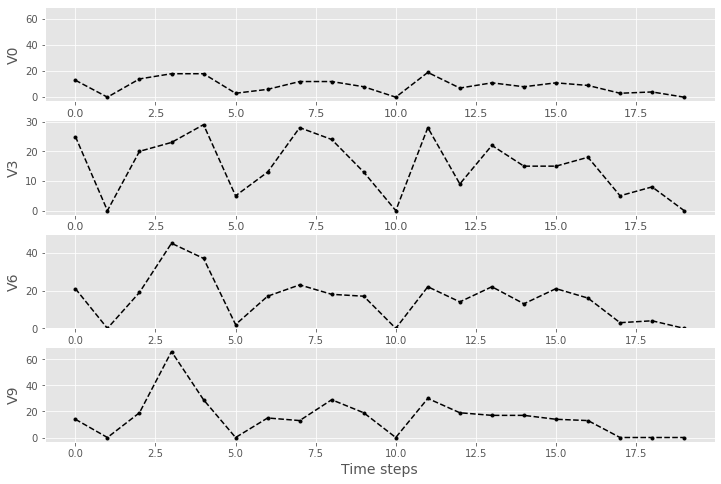

In [13]:
P = Population(20,0.5,0.5,30)

timeSteps = [10,50,100,150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]
#timeSteps = [10,100,500,1000,1500,2000,2500,3000,3500,4000]
S = Simulate(timeSteps)

S.addCars = True
S.runSimulation(P)
#S.printMap(False)
S.plotData()
Features, Labels = S.getLearningData()
S.generateTestingData(100)
tFeatures, tLabels = S.getTestingData()
#print(tLabels)
#print(tFeatures)

#override features
#S.generateTestingData(1000)
#Features, Labels = S.getTestingData()

del S

In [9]:
#https://vknight.org/unpeudemath/code/2015/08/01/simulating_continuous_markov_chains.html

## Plot MarkovChain

In [10]:
'''
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

g1 = """digraph top {
   a -> b -> c;
}"""
draw(g1)
'''

'\nimport pygraphviz as pgv\nfrom IPython.display import Image\n\ndef draw(dot):\n    return Image(pgv.AGraph(dot).draw(format=\'png\', prog=\'dot\'))\n\ng1 = """digraph top {\n   a -> b -> c;\n}"""\ndraw(g1)\n'

## Decision Tree Classifier

In [6]:
from sklearn import tree
X = Features
Y = Labels
pLabels = []
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

matched = 0
for i in range(len(tFeatures)):
    #print(clf.predict([tFeatures[i]]),"-->",tLabels[i])
    if clf.predict([tFeatures[i]]) == tLabels[i]:
        matched+=1
    pLabels.append(clf.predict([tFeatures[i]])[0])
        
#print(len(pLabels), len(tLabels))
print("accuracy: ", matched/len(tFeatures))

#clf.predict([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])
#clf.predict_proba([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])

accuracy:  0.48


In [12]:
'''
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("traffic_tree") 
'''

'\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("traffic_tree") \n'

## Deep Learning Model MLPClassifier

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics

classifier = LogisticRegression()
classifier.fit(Features, Labels)
score = metrics.accuracy_score(Labels, classifier.predict(Features))
print("Accuracy: %f" % score)

Accuracy: 0.607895


https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [8]:
from sklearn.neural_network import MLPClassifier
X = Features
y = Labels
print("data:",len(X))
print("labels:",len(y))

[print(X[i], end=' ') for i in range(5)] 
print()
[print(y[i], end=' ') for i in range(5)] 
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)

matched = 0
for i in range(len(tFeatures)):
    if clf.predict([tFeatures[i]]) == tLabels[i]:
        matched+=1
    #print(clf.predict([test])[0],"-->",Labels[i])
print("\naccuracy: ", matched/len(tFeatures))
print("\nscore:", clf.score(Features, Labels))

#clf.predict_proba([[2., 2.], [1., 2.]])

data: 380
labels: 380
[0.647991443122875, 0.30603174947423945, 0.045976807402885525, 0.24767306813878243, 0.6334007011989257, 0.11892623066229183, 0.31382501727557605, 0.1148588416022514, 0.5713161411221727, 0] [0.5578317714572362, 0.25380025871303036, 0.18836796982973342, 0.14364280721605857, 0.7702486641557862, 0.08610852862815524, 0.26215700632431954, 0.1690003522481066, 0.5688426414275739, 1] [0.5599589175669946, 0.2368348572626111, 0.20320622517039436, 0.3501917851275132, 0.5488555182071952, 0.10095269666529164, 0.030265686370660794, 0.4303616205671722, 0.5393726930621671, 0] [0.753156711539312, 0.1713295216859599, 0.07551376677472801, 0.11177380931390692, 0.5528937030539708, 0.33533248763212237, 0.21025309538891682, 0.31810017378423094, 0.47164673082685227, 0] [0.4109177965183605, 0.3884194412083962, 0.20066276227324337, 0.3740949383622675, 0.5302976508724325, 0.0956074107653, 0.2970667253319951, 0.11299374721277479, 0.5899395274552302, 0] 
straight left left left right 
accuracy

c:\Users\aliha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Confusion Matrix

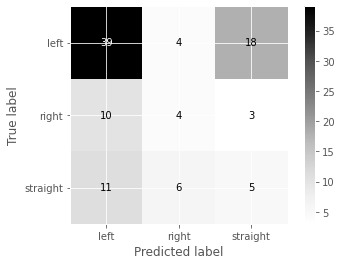

In [10]:
def labelToNum(lbls):
    temp = []
    for i in lbls:
        if i == 'left': temp.append(0)
        elif i == 'straight': temp.append(1)
        elif i == 'right' : temp.append(2)
    return temp

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = tLabels
predicted = pLabels

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=clf.classes_)#["left", "straight", "right"])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)#[False, True])

cm_display.plot(cmap = 'Greys')
plt.show() 

In [ ]:
#LATEST 10/06